In [1]:
# Conferindo as versões das dependências que serão usadas
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [3]:
# carregando o dataset da URL

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names, skiprows=1)
dataset


,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal-length  149 non-null    float64 
 1   sepal-width   149 non-null    float64 
 2   petal-length  149 non-null    float64 
 3   petal-width   149 non-null    float64 
 4   class         149 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [4]:
dataset['class'] = dataset['class'].astype('category')

dataset.info() # Economiza 2 kb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal-length  149 non-null    float64 
 1   sepal-width   149 non-null    float64 
 2   petal-length  149 non-null    float64 
 3   petal-width   149 non-null    float64 
 4   class         149 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [6]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='class'>

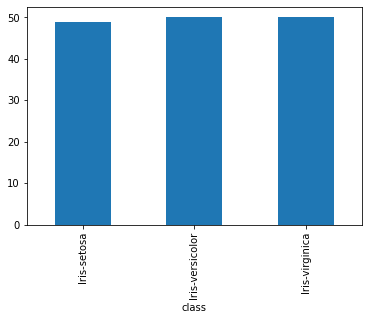

In [7]:
# Distribuição de classes
dataset.groupby('class').size().plot(kind='bar')

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

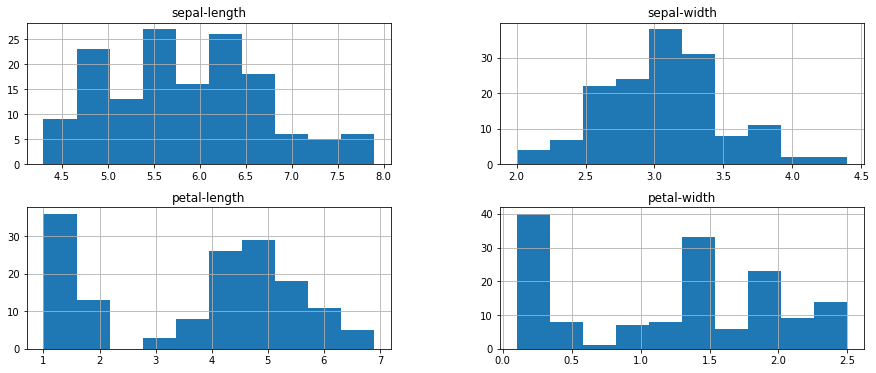

In [8]:
# Histogramas

dataset.hist(figsize=(15,6))

array([[<AxesSubplot:xlabel='sepal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-width'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='petal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-

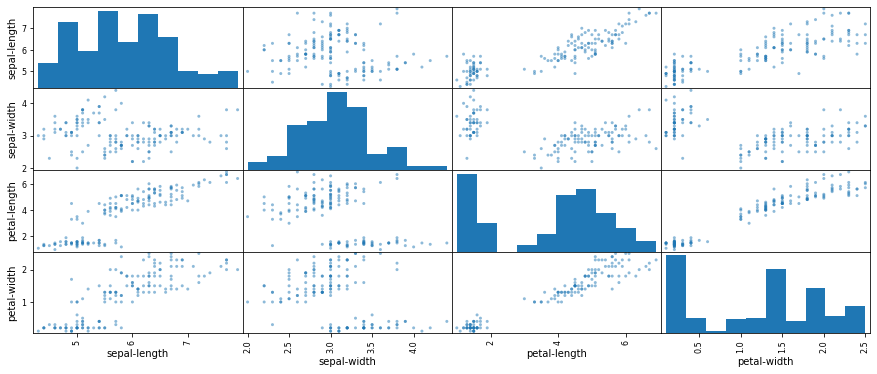

In [9]:
# scatter plot matrix

scatter_matrix(dataset, figsize=(15,6))